# EDA Assignment (Spring 2024)
----------------------------------------
* Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut

**Your Name Here:**

Groups of four students - give feedback to at least one other person (everyone must receive feedback). First come, first serve!



The purpose of this assignment is to get you working with the two most common visualization libraries in Python, `matplotlib` (plt) and `seaborn` (sns).

# Rubric
* Each student will decide to use `matplotlib` or `seabron` or both.
* (10 pts) Find **FIVE** interesting examples blogs/websites where datasets are cleaned and/or  EDA is completed with `matplotlib` or `sns`. List and describe the sources that you used in a subheader with a short description of the website.
* (60 pts) Each student will use the dataset that is given to create a total of **TWO** interesting plots (using `matplotlib` or `sns` or a mix). and **ONE** interesting table for each data set ("Incentives by State" and "Efficiency by vehicle".) Each item must have a useful caption with a description of what the output shows and what insights can be derived.
* (20 pts) Students will post to HuskyCT forum for peer review - thoughtful comments MUST be given (what was good, what could be improved, something new that could be added.) Since this is a dirty dataset, I expect some comments to be about data cleaning!
* After posting their script for review for peer feedback (as both as shareable link viewable to anyone with the link and as an uploaded file to HuskyCT), students will compare each others code quality and captions (business value of plots and tables) and make a suggestions for improvement.

## Examples of common feedback items on HuskyCT
* "I like how you tried four different plots instead of just using one plot over and over again"
* "That way of cleaning that column was amazing - I'm going to try that on my script too - my way was too manual, yours was way cleaner"
* "Your caption for Figure 2 could be more clear - maybe say something like this..."
* "I think it would be interesting to redo Table 2 but group by variable X instead of Z, that way you could get a better understanding of..."
* "I think you could have made a more thougtful caption for Figure 1 - what is the real value of the plot?"

❌ Do not just blindly copy/paste AI-generated code - if I ask you to explain something you submit for credit and you can't do it, you get a 0 for the entire assignment. Make sure you understand what you are doing and come to office hours if you are stuck!

# Sources
Here is an example of a good source:
* [How to Perform Exploratory Data Analysis with Seaborn - Lorraine Lee](https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d)
  * This article was useful because it had a thorough presentation on making plots for categorical and numeric data in seaborn and had lots of 'hackable' code for making subplots.

  You should have five cool sources!

# Overview

EVs aren't going away, why not apply what you've learned about EDA to a cool new (dirty) dataset? There are two datasets from Wikipedia for you to check. You will make 3 cool outputs for each dataset, share it with your group (and get feedback!), then you will submit to me.

![pacifica](https://di-uploads-pod8.dealerinspire.com/ranchochryslerjeepdodgeram/uploads/2023/03/2023-Chrysler-Pacifica-SilverMist-Cityscape.jpeg)

## Read the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mute setting with copying warning
pd.options.mode.chained_assignment = None  # default='warn'

# 🔵 Incentives by State

Take a look at this table - the primary key actually spans two or three columns - State and Type of PEV/Vehicle. And you already see that it's messy - look at Colarado vs. Connecticut! You will need to recode values using replace values.

In [ ]:
df_state = pd.read_html('https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_the_United_States')[1]
df_state

,State,Amount of incentive,Type of PEV/vehicle,Type of incentive,Carpool lane access,Comments
0,Arizona,NaN,BEVs,Lower vehicle licensing tax,Yes,Eligibility for PHEVs depends on the extent to...
1,California,"up to $2,500",BEVs,Purchase rebate,Yes,"Free access to HOVs through January 1, 2019, w..."
2,California,"up to $2,500",PHEVs,Purchase rebate,Yes,"PHEV free access to HOV lanes until January 1,..."
3,California,"up to $1,500",Electric motorcycles and NEVs,Purchase rebate,Yes,All motorcycles have free access to HOV lanes.
4,Colorado,"$5,000",BEVs and PHEVs,Income tax credit,No,"$5,000 refundable tax credit on all new BEVs a..."
5,Connecticut,"up to $3,000","BEVs, PHEV",Rebate,No,"CHEAPR provides up to $3,000 for fuel cell EV,..."
6,Delaware,"up to $2,200",EV,Rebate,No,Customers with at a grid-integrated EV may qua...
7,District of Columbia,NaN,BEVs and PHEVs,Excise tax exemption and reduced registration ...,No,A tax credit up to 50% of the equipment costs ...
8,Florida,NaN,BEVs and PHEVs,NaN,Yes,"Access to HOVs through January 1, 2018 if disp..."
9,Georgia,$0,ZEVs,Income tax credit,Yes,Tax credit of 20% of the cost of a zero emissi...


I'll help you get started. Looks like we need to combine 'BEVs and PHEVs' and 'BEVs, PHEV'. We can just replace values to make this happen! Then we are ready to go!

In [ ]:
# return unique values in column
df_state['Type of PEV/vehicle'].value_counts()

BEVs and PHEVs                    11
BEVs, PHEV                        10
BEVs                               5
EV                                 2
Alternative fuel conversion        2
BEVs, PHEVs and conversions        2
PHEV                               2
PHEVs                              1
Electric motorcycles  and NEVs     1
ZEVs                               1
Commercial AFVs                    1
BEVs, PHEVs and HEVs               1
Conversions only                   1
Name: Type of PEV/vehicle, dtype: int64

In [ ]:
# replace value in column
df_state['Type of PEV/vehicle'].replace(['BEVs and PHEVs', 'BEVs, PHEV'], 'BEVs and PHEVs', inplace=True)
df_state['Type of PEV/vehicle'].replace(['PHEVs'], 'PHEV', inplace=True)

# check your work - it worked!
df_state['Type of PEV/vehicle'].value_counts()



BEVs and PHEVs                    21
BEVs                               5
PHEV                               3
EV                                 2
Alternative fuel conversion        2
BEVs, PHEVs and conversions        2
Electric motorcycles  and NEVs     1
ZEVs                               1
Commercial AFVs                    1
BEVs, PHEVs and HEVs               1
Conversions only                   1
Name: Type of PEV/vehicle, dtype: int64

In [ ]:
df_state


,State,Amount of incentive,Type of PEV/vehicle,Type of incentive,Carpool lane access,Comments
0,Arizona,NaN,BEVs,Lower vehicle licensing tax,Yes,Eligibility for PHEVs depends on the extent to...
1,California,"up to $2,500",BEVs,Purchase rebate,Yes,"Free access to HOVs through January 1, 2019, w..."
2,California,"up to $2,500",PHEV,Purchase rebate,Yes,"PHEV free access to HOV lanes until January 1,..."
3,California,"up to $1,500",Electric motorcycles and NEVs,Purchase rebate,Yes,All motorcycles have free access to HOV lanes.
4,Colorado,"$5,000",BEVs and PHEVs,Income tax credit,No,"$5,000 refundable tax credit on all new BEVs a..."
5,Connecticut,"up to $3,000",BEVs and PHEVs,Rebate,No,"CHEAPR provides up to $3,000 for fuel cell EV,..."
6,Delaware,"up to $2,200",EV,Rebate,No,Customers with at a grid-integrated EV may qua...
7,District of Columbia,NaN,BEVs and PHEVs,Excise tax exemption and reduced registration ...,No,A tax credit up to 50% of the equipment costs ...
8,Florida,NaN,BEVs and PHEVs,NaN,Yes,"Access to HOVs through January 1, 2018 if disp..."
9,Georgia,$0,ZEVs,Income tax credit,Yes,Tax credit of 20% of the cost of a zero emissi...


Use this as inspiration to make three interesting outputs - at least one plot and at least one table.

## 🔴 Interesting Output 1

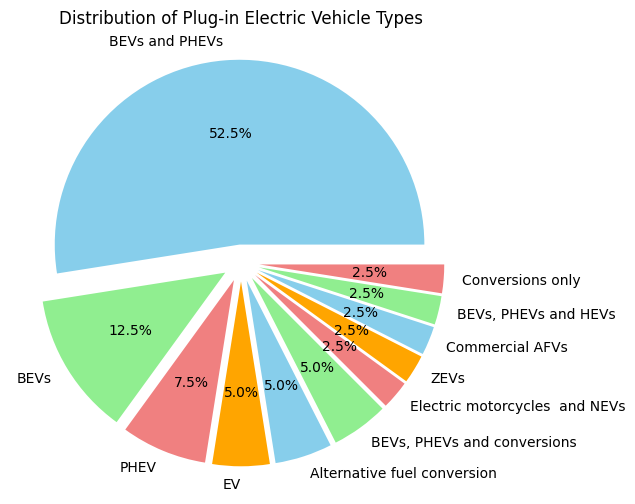

In [ ]:
#Distribution of Plug-in Electric Vehicle

plt.figure(figsize=(10, 6))
categories = df_state['Type of PEV/vehicle'].value_counts().index
explode = (0.1,) * len(categories)  # Adjust the explode ratio as needed

df_state['Type of PEV/vehicle'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'], explode=explode)
plt.title('Distribution of Plug-in Electric Vehicle Types')
plt.ylabel('')  # Remove the default 'Type of PEV/vehicle' label for a cleaner look
plt.show()



**This code generates a pie chart to visualize the distribution of Plug-in Electric Vehicle (PEV) types based on the 'Type of Vehicle' column in the DataFrame df_state. The chart displays the percentage distribution of each Vehicle type, and colors are specified for better visualization.**

## 🔴 Interesting Output 2

In [ ]:
# A Pivot Table showing the sum of incentives for each state

df_state['Amount of incentive'] = df_state['Amount of incentive'].apply(lambda x: 0 if pd.isna(x) else int(''.join(filter(str.isdigit, str(x)))))
pivot_table_states = df_state.groupby('State')['Amount of incentive'].sum().reset_index().sort_values(by='Amount of incentive', ascending=False)
pivot_table_states = pivot_table_states.reset_index(drop=True)  # Setting index=False to remove the default index column

print("\nPivot Table: Sum of Incentives by State")
print(pivot_table_states)



Pivot Table: Sum of Incentives by State
                   State  Amount of incentive
0                Georgia                22500
1               Missouri                15000
2             California                 6500
3             New Jersey                 5000
4               Colorado                 5000
5               Maryland                 3000
6                   Utah                 3000
7              Louisiana                 3000
8            Connecticut                 3000
9               Delaware                 2200
10          Pennsylvania                 2000
11               Indiana                 1650
12        South Carolina                 1500
13         Massachusetts                 1000
14               Montana                  500
15              Oklahoma                   75
16              Virginia                    0
17                 Texas                    0
18             Tennessee                    0
19        North Carolina               


**This creates a pivot table that shows the sum of incentives for each state based on the 'Amount of incentive' column in the DataFrame df_state. The result is printed as a table displaying the total incentives for each state, sorted in descending order by the sum of incentives.**

## 🔴 Interesting Output 3


Count of Rows with Carpool Lane Access as Yes: 18

Top 5 States with Carpool Lane Access as Yes:
California    3
Georgia       3
Utah          2
Arizona       1
Florida       1
Name: State, dtype: int64


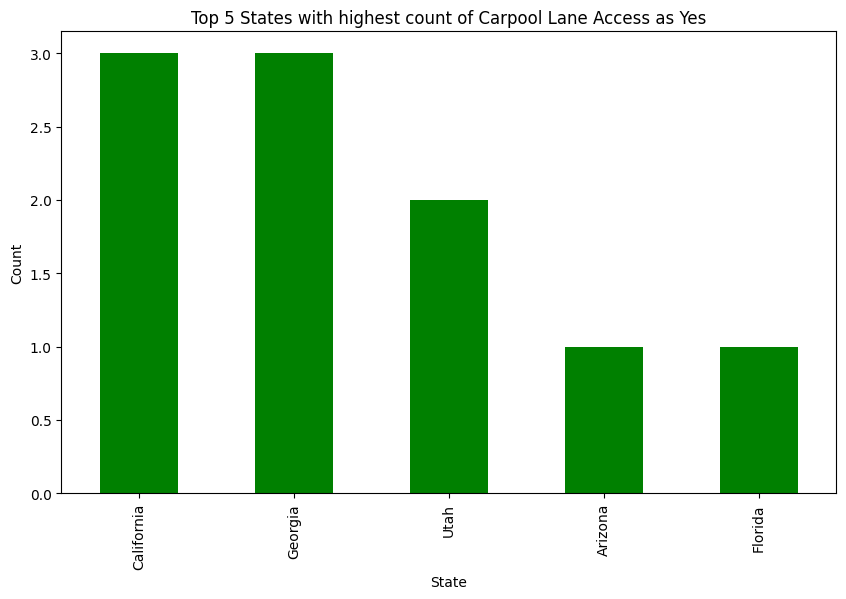

In [ ]:
#Count showing Carpool access
df_state['Carpool lane access'].replace(['Yes[60]'], 'Yes', inplace=True)
# Extract numeric values from 'Amount of incentive', replacing NaN with 0
df_state['Amount of incentive'] = df_state['Amount of incentive'].apply(lambda x: 0 if pd.isna(x) else int(''.join(filter(str.isdigit, str(x)))))
# Filter rows where 'Carpool lane access' is 'Yes'
carpool_access_yes = df_state[df_state['Carpool lane access'] == 'Yes']
count_carpool_access_yes = carpool_access_yes.shape[0]
print("\nCount of Rows with Carpool Lane Access as Yes:", count_carpool_access_yes)
# Display the top states where 'Carpool lane access' is 'Yes'
top_states_carpool_access_yes = carpool_access_yes['State'].value_counts().head(5)
print("\nTop 5 States with Carpool Lane Access as Yes:")
print(top_states_carpool_access_yes)
#Visualize the top-5 states with highest COUNT(having Carpool lane access = Yes)
plt.figure(figsize=(10, 6))
carpool_access_yes['State'].value_counts().head(5).plot(kind='bar', color='green')
plt.title('Top 5 States with highest count of Carpool Lane Access as Yes')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


**This processes a DataFrame (df_state) by cleaning and transforming specific columns, then counts and displays the number of rows where 'Carpool lane access' is 'Yes'. It also identifies and prints the top 5 states with the highest count of 'Carpool lane access' set to 'Yes' and visualizes this information using a bar plot.**

# 🔵 Efficiency by vehicle

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_the_United_States')[4]
df

Vehicle  \
                                              Vehicle   
0                    Hyundai Ioniq Electric[104][107]   
1                             Toyota Prius Prime[109]   
2                             Toyota Prius Prime[109]   
3                           BMW i3 (60 A·h)[106][111]   
4                                    Scion iQ EV[113]   
..                                                ...   
80                    Porsche Cayenne S E-Hybrid[168]   
81                    Porsche Cayenne S E-Hybrid[168]   
82                               McLaren P1[106][169]   
83                               McLaren P1[106][169]   
84  Notes: (1) In November 2010, EPA introduced MP...   

                                           Model year  \
                                           Model year   
0                                                2017   
1                                                2017   
2                                                2017   
3                                    2014, 2015, 2016   
4                                                2013   
..                                                ...   
80                                               2015   
81                                               2015   
82                                               2014   
83                                               2014   
84  Notes: (1) In November 2010, EPA introduced MP...   

                                 Operating mode (AER)  \
                                 Operating mode (AER)   
0                               All-electric (124 mi)   
1                                 Electricity (25 mi)   
2                                       Gasoline only   
3                                All-electric (81 mi)   
4                                All-electric (38 mi)   
..                                                ...   
80                   Electricity and gasoline (14 mi)   
81                                      Gasoline only   
82                   Electricity and gasoline (19 mi)   
83                                      Gasoline only   
84  Notes: (1) In November 2010, EPA introduced MP...   

                             EPA fuel economy ratings  \
                                             Combined   
0                          136 mpg-e (25 kW·h/100 mi)   
1                        133 mpg‑e (25.3 kW⋅h/100 mi)   
2                                              54 mpg   
3                          124 mpg-e (27 kW·h/100 mi)   
4                          121 mpg-e (28 kW·h/100 mi)   
..                                                ...   
80                          47 mpg-e (69 kW·h/100 mi)   
81                                             22 mpg   
82                          18 mpg-e (25 kW·h/100 mi)   
83                                             17 mpg   
84  Notes: (1) In November 2010, EPA introduced MP...   

                                                       \
                                                 City   
0                          150 mpg-e (22 kW·h/100 mi)   
1                                                   -   
2                                      55 mpg/ 53 mpg   
3                          137 mpg-e (25 kW·h/100 mi)   
4                          138 mpg-e (24 kW·h/100 mi)   
..                                                ...   
80                                                  -   
81                                                  -   
82                                                  -   
83                                             16 mpg   
84  Notes: (1) In November 2010, EPA introduced MP...   

                                                       \
                                              Highway   
0                          122 mpg-e (28 kW·h/100 mi)   
1                                                   -   
2                                                   -   
3                          111 mpg-e (30 kW·h/100 m

I'll help you get started - real-world data is messy. See the header? See the last row? These will cause problems for you. The multi-index is ANNOYING for selecting the column you want, and the last row is a text cell that repeats for each column. This is a little advanced for new coders, but you have to have good instincts.

* https://towardsdatascience.com/how-to-flatten-multiindex-columns-and-rows-in-pandas-f5406c50e569
* https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe

In [ ]:
# drop the last row
df = df[:-1]

# collapse the multi-index
df.columns = df.columns.get_level_values(0)

# check your work
df.head()

,Vehicle,Model year,Operating mode (AER),EPA fuel economy ratings,EPA fuel economy ratings,EPA fuel economy ratings,Cost to drive 25 miles,"Annual fuel cost(2) (15,000 mi)",Notes
0,Hyundai Ioniq Electric[104][107],2017,All-electric (124 mi),136 mpg-e (25 kW·h/100 mi),150 mpg-e (22 kW·h/100 mi),122 mpg-e (28 kW·h/100 mi),$0.81,$500,The 2017 Hyundai Ioniq Electric is the most fu...
1,Toyota Prius Prime[109],2017,Electricity (25 mi),133 mpg‑e (25.3 kW⋅h/100 mi),-,-,-,-,The 2017 Prius Prime is the most energy-effici...
2,Toyota Prius Prime[109],2017,Gasoline only,54 mpg,55 mpg/ 53 mpg,-,-,-,The 2017 Prius Prime is the most energy-effici...
3,BMW i3 (60 A·h)[106][111],"2014, 2015, 2016",All-electric (81 mi),124 mpg-e (27 kW·h/100 mi),137 mpg-e (25 kW·h/100 mi),111 mpg-e (30 kW·h/100 mi),$0.88,$500,The 2014/15/16 BMW i3 was the most fuel effici...
4,Scion iQ EV[113],2013,All-electric (38 mi),121 mpg-e (28 kW·h/100 mi),138 mpg-e (24 kW·h/100 mi),105 mpg-e (32 kW·h/100 mi),$0.84,$500,The iQ EV is only available in limited numbers...


See how the data is dirty? You need to clean it up! Get rid of special characters like dollar signs, periods, commas and anything else that is annoying! I leave this to you to figure out.

In [ ]:
df.columns

Index(['Vehicle', 'Model year', 'Operating mode (AER)',
       'EPA fuel economy ratings', 'EPA fuel economy ratings',
       'EPA fuel economy ratings', 'Cost to drive 25 miles',
       'Annual fuel cost(2) (15,000 mi)', 'Notes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vehicle                          84 non-null     object
 1   Model year                       84 non-null     object
 2   Operating mode (AER)             84 non-null     object
 3   EPA fuel economy ratings         84 non-null     object
 4   EPA fuel economy ratings         84 non-null     object
 5   EPA fuel economy ratings         84 non-null     object
 6   Cost to drive 25 miles           84 non-null     object
 7   Annual fuel cost(2) (15,000 mi)  84 non-null     object
 8   Notes                            59 non-null     object
dtypes: object(9)
memory usage: 6.0+ KB


This one was hard for me too - there was a special character HIDING in this column name!

In [ ]:
# look at how nasty this column name secretly is!
df.columns[7]

'Annual fuel cost(2) (15,000\xa0mi)'

In [ ]:
# rename the column
df.rename({df.columns[7]  : 'Annual fuel cost'}, axis='columns', inplace=True)
# check your work
df.head()



,Vehicle,Model year,Operating mode (AER),EPA fuel economy ratings,EPA fuel economy ratings,EPA fuel economy ratings,Cost to drive 25 miles,Annual fuel cost,Notes
0,Hyundai Ioniq Electric[104][107],2017,All-electric (124 mi),136 mpg-e (25 kW·h/100 mi),150 mpg-e (22 kW·h/100 mi),122 mpg-e (28 kW·h/100 mi),$0.81,$500,The 2017 Hyundai Ioniq Electric is the most fu...
1,Toyota Prius Prime[109],2017,Electricity (25 mi),133 mpg‑e (25.3 kW⋅h/100 mi),-,-,-,-,The 2017 Prius Prime is the most energy-effici...
2,Toyota Prius Prime[109],2017,Gasoline only,54 mpg,55 mpg/ 53 mpg,-,-,-,The 2017 Prius Prime is the most energy-effici...
3,BMW i3 (60 A·h)[106][111],"2014, 2015, 2016",All-electric (81 mi),124 mpg-e (27 kW·h/100 mi),137 mpg-e (25 kW·h/100 mi),111 mpg-e (30 kW·h/100 mi),$0.88,$500,The 2014/15/16 BMW i3 was the most fuel effici...
4,Scion iQ EV[113],2013,All-electric (38 mi),121 mpg-e (28 kW·h/100 mi),138 mpg-e (24 kW·h/100 mi),105 mpg-e (32 kW·h/100 mi),$0.84,$500,The iQ EV is only available in limited numbers...


In [ ]:
# remove special characters
df['Annual fuel cost'] = df['Annual fuel cost'].str.replace('$', '')
df['Annual fuel cost'] = df['Annual fuel cost'].str.replace('-', '')
df['Annual fuel cost'] = df['Annual fuel cost'].str.replace(',', '')
df.head()

<ipython-input-16-0b8b2a70f819>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Annual fuel cost'] = df['Annual fuel cost'].str.replace('$', '')


,Vehicle,Model year,Operating mode (AER),EPA fuel economy ratings,EPA fuel economy ratings,EPA fuel economy ratings,Cost to drive 25 miles,Annual fuel cost,Notes
0,Hyundai Ioniq Electric[104][107],2017,All-electric (124 mi),136 mpg-e (25 kW·h/100 mi),150 mpg-e (22 kW·h/100 mi),122 mpg-e (28 kW·h/100 mi),$0.81,500,The 2017 Hyundai Ioniq Electric is the most fu...
1,Toyota Prius Prime[109],2017,Electricity (25 mi),133 mpg‑e (25.3 kW⋅h/100 mi),-,-,-,,The 2017 Prius Prime is the most energy-effici...
2,Toyota Prius Prime[109],2017,Gasoline only,54 mpg,55 mpg/ 53 mpg,-,-,,The 2017 Prius Prime is the most energy-effici...
3,BMW i3 (60 A·h)[106][111],"2014, 2015, 2016",All-electric (81 mi),124 mpg-e (27 kW·h/100 mi),137 mpg-e (25 kW·h/100 mi),111 mpg-e (30 kW·h/100 mi),$0.88,500,The 2014/15/16 BMW i3 was the most fuel effici...
4,Scion iQ EV[113],2013,All-electric (38 mi),121 mpg-e (28 kW·h/100 mi),138 mpg-e (24 kW·h/100 mi),105 mpg-e (32 kW·h/100 mi),$0.84,500,The iQ EV is only available in limited numbers...


With special characters, the column is hiding as a string - so you can't do math on it! You need to convert in to numeric. And once it's numeric, you can make cool plots and compute summary stats.

<Axes: >

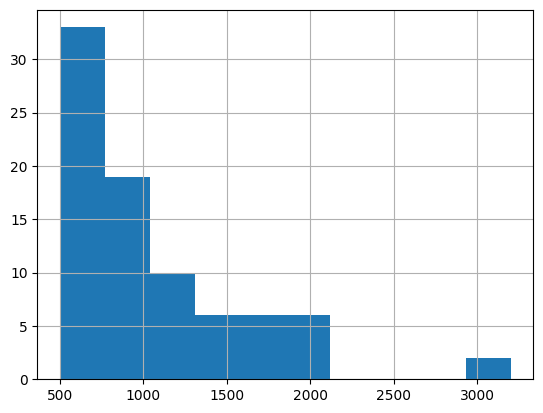

In [ ]:
# convert column to numeric
df['Annual fuel cost'] = pd.to_numeric(df['Annual fuel cost'])
df['Annual fuel cost'].hist()

I have given you most of the tools you need to be successul! Take your time and try to crack this dataset open. Use AI to help you make even more amazing outputs if you want, but you have to understand what you coded, don't just copy blindly.

In [ ]:
#Data Cleaning

# Clean the 'Model year' column
df['Model year'] = df['Model year'].str.extract(r'(\d{4})')

# Clean the 'Vehicle' column
df['Vehicle'] = df['Vehicle'].apply(lambda x: x.split('[')[0].strip())

#Get the type of Type of Vehicle only
df['Operating mode (AER)'] = df['Operating mode (AER)'].str.split('(').str[0].str.strip()

df['Cost to drive 25 miles'] = pd.to_numeric(df['Cost to drive 25 miles'].replace('[\$,]', '', regex=True), errors='coerce').fillna(0)

# Convert 'Annual fuel cost' to numeric and replace NaN with 0
df['Annual fuel cost'] = pd.to_numeric(df['Annual fuel cost'].replace('[\$,]', '', regex=True), errors='coerce').fillna(0)

# Display the updated DataFrame
df

,Vehicle,Model year,Operating mode (AER),EPA fuel economy ratings,EPA fuel economy ratings,EPA fuel economy ratings,Cost to drive 25 miles,Annual fuel cost,Notes
0,Hyundai Ioniq Electric,2017,All-electric,136 mpg-e (25 kW·h/100 mi),150 mpg-e (22 kW·h/100 mi),122 mpg-e (28 kW·h/100 mi),0.81,500.0,The 2017 Hyundai Ioniq Electric is the most fu...
1,Toyota Prius Prime,2017,Electricity,133 mpg‑e (25.3 kW⋅h/100 mi),-,-,0.00,0.0,The 2017 Prius Prime is the most energy-effici...
2,Toyota Prius Prime,2017,Gasoline only,54 mpg,55 mpg/ 53 mpg,-,0.00,0.0,The 2017 Prius Prime is the most energy-effici...
3,BMW i3 (60 A·h),2014,All-electric,124 mpg-e (27 kW·h/100 mi),137 mpg-e (25 kW·h/100 mi),111 mpg-e (30 kW·h/100 mi),0.88,500.0,The 2014/15/16 BMW i3 was the most fuel effici...
4,Scion iQ EV,2013,All-electric,121 mpg-e (28 kW·h/100 mi),138 mpg-e (24 kW·h/100 mi),105 mpg-e (32 kW·h/100 mi),0.84,500.0,The iQ EV is only available in limited numbers...
...,...,...,...,...,...,...,...,...,...
79,Porsche Panamera S E-Hybrid,2014,Gasoline only,25 mpg,23 mpg,29 mpg,3.81,1850.0,The all-electric range is between 0 to 15 mi.[...
80,Porsche Cayenne S E-Hybrid,2015,Electricity and gasoline,47 mpg-e (69 kW·h/100 mi),-,-,2.07,2100.0,NaN
81,Porsche Cayenne S E-Hybrid,2015,Gasoline only,22 mpg,-,-,4.33,2100.0,NaN
82,McLaren P1,2014,Electricity and gasoline,18 mpg-e (25 kW·h/100 mi),-,-,5.38,3200.0,The P1 does not run on 100% electricity as it ...


## 🔴 Interesting Output 4

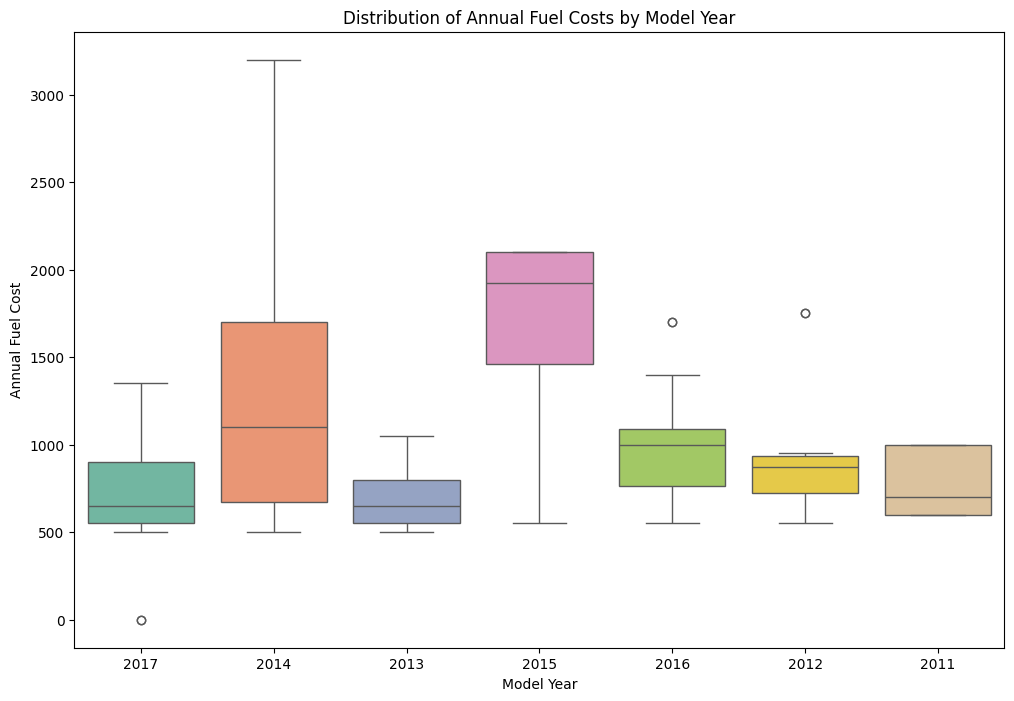

In [ ]:
# Visualization: Distribution of Annual Fuel Costs by Model Year

plt.figure(figsize=(12, 8))
sns.boxplot(x='Model year', y='Annual fuel cost', data=df, palette='Set2', hue='Model year')
plt.title('Distribution of Annual Fuel Costs by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Annual Fuel Cost')
plt.show()


**This code creates a boxplot visualization depicting the distribution of annual fuel costs for different model years, using seaborn with a specified color palette.**

## 🔴 Interesting Output 5

Top 10 Vehicles by Average Cost to Drive 25 Miles:
                        Vehicle  Cost to drive 25 miles
30                   McLaren P1                   5.490
39  Porsche Panamera S E-Hybrid                   3.650
21                 Fisker Karma                   3.310
38   Porsche Cayenne S E-Hybrid                   3.200
37           Porsche 918 Spyder                   2.915
5              BMW X5 xDrive40e                   2.880
10                       BMW i8                   2.795
32        Mercedes-Benz S 500 e                   2.700
49                Volvo XC90 T8                   2.350
3         BMW 740e iPerformance                   2.255


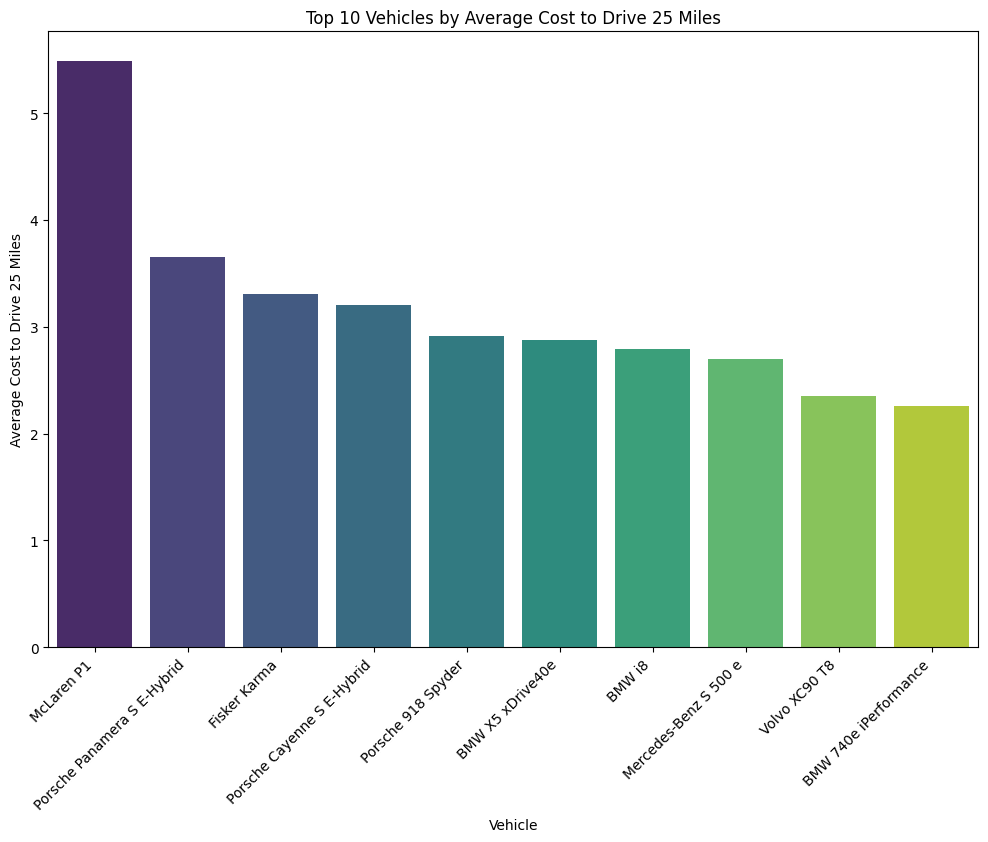

In [ ]:
#Top 10 Vehicles to be considered in terms of the Average Cost to Drive 25 Miles

#Calculate the average cost to drive 25 miles per vehicle
df['Cost to drive 25 miles'] = pd.to_numeric(df['Cost to drive 25 miles'], errors='coerce')  # Convert to numeric
average_costs = df.groupby('Vehicle')['Cost to drive 25 miles'].mean().reset_index()

#Get the top 10 vehicles
top_10_vehicles = average_costs.nlargest(10, 'Cost to drive 25 miles')

#Display the calculation table for the top 10 vehicles
print("Top 10 Vehicles by Average Cost to Drive 25 Miles:")
print(top_10_vehicles)

#Visualization: Bar plot of top 10 vehicles by average cost to drive 25 miles
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle', y='Cost to drive 25 miles', data=top_10_vehicles, palette='viridis',hue='Vehicle')
plt.title('Top 10 Vehicles by Average Cost to Drive 25 Miles')
plt.xlabel('Vehicle')
plt.ylabel('Average Cost to Drive 25 Miles')
plt.xticks(rotation=45, ha='right')
plt.show()

**This code calculates and displays the top 10 vehicles based on the average cost to drive 25 miles, presenting the results in a table and visualizing them through a seaborn bar plot.**

## 🔴 Interesting Output 6

In [ ]:
# good luck!

        Operating mode (AER)  Annual fuel cost
0               All-electric        619.642857
1                Electricity          0.000000
2  Electricity and  gasoline       1550.000000
3   Electricity and gasoline       1420.000000
4           Electricity only       1156.250000
5              Gasoline only       1223.214286


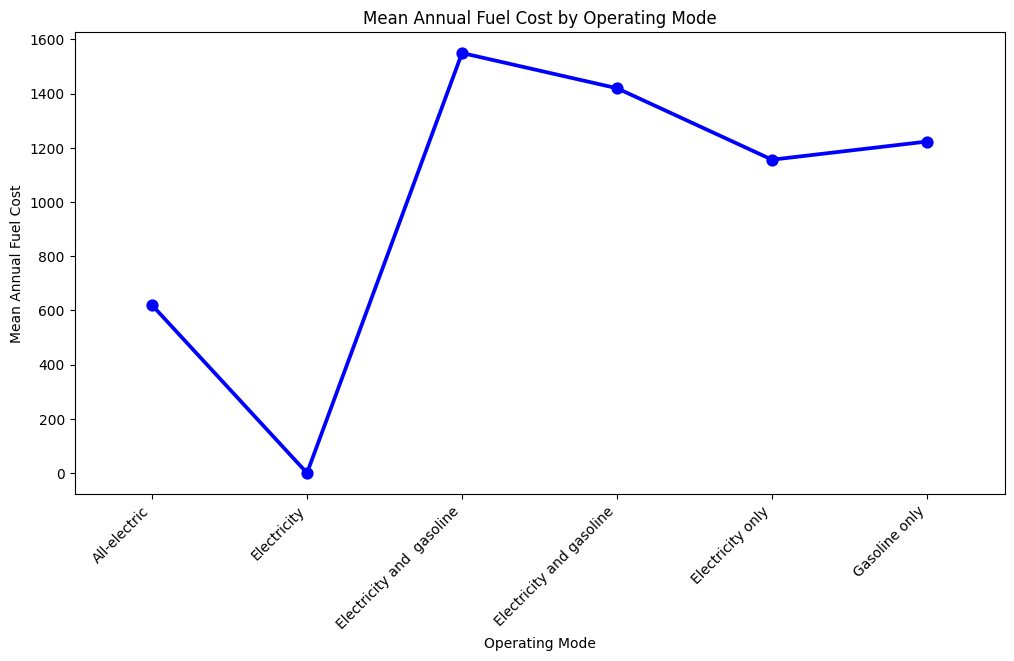

In [ ]:
#Distribution of Mean Annual Fuel Cost by Operating Mode

data = df.groupby('Operating mode (AER)')['Annual fuel cost'].mean().reset_index()
print(data)
#Visualization
plt.figure(figsize=(12, 6))
sns.pointplot(x='Operating mode (AER)', y='Annual fuel cost', data=data, color='blue', capsize=0.1)
plt.title('Mean Annual Fuel Cost by Operating Mode')
plt.xlabel('Operating Mode')
plt.ylabel('Mean Annual Fuel Cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**This code calculates the average annual fuel cost per operating mode from a DataFrame, and then visualizes the results using a seaborn point plot.**


## Websites:
1) https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

2) https://github.com/jukedeck/nottingham-dataset/tree/master

3) https://medium.com/analytics-vidhya/machine-learning-and-data-analysis-with-python-titanic-dataset-part-3-submit-to-kaggle-a63f98f29657

4) https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

5) https://www.kaggle.com/datasets/sazidthe1/world-population-data